In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
file = r"/content/tweet.csv"
df = pd.read_csv(file,encoding='latin')

**EDA**

In [3]:
#Top five records
df.head()

tweets       class
0  Be aware  dirty step to get money  #staylight ...  figurative
1  #sarcasm for #people who don't understand #diy...  figurative
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative
3  @wilw Why do I get the feeling you like games?...  figurative
4  -@TeacherArthurG @rweingarten You probably jus...  figurative

In [4]:
#Last five records
df.tail()

tweets    class
81403  Photo: Image via We Heart It http://t.co/ky8Nf...  sarcasm
81404  I never knew..I better put this out to the Uni...  sarcasm
81405  hey just wanted to say thanks @ puberty for le...  sarcasm
81406  I'm sure coverage like the Fox News Special â...  sarcasm
81407  @skeyno16 at u13?! I won't believe it until I ...  sarcasm

In [5]:
#features
df.columns

Index(['tweets', 'class'], dtype='object')

In [6]:
#Shape of dataset
df.shape

(81408, 2)

In [7]:
#Data Transformation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81408 entries, 0 to 81407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81408 non-null  object
 1   class   81408 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [8]:
#Discription
df.describe()

tweets       class
count                                               81408       81408
unique                                              67997           4
top     $$$=&gt;&gt; #peace #love #freedom\n#fight for...  figurative
freq                                                   14       21238

In [9]:
#Datatype
df.dtypes

tweets    object
class     object
dtype: object

In [10]:
#Check for null values
df.isnull().any()

tweets    False
class     False
dtype: bool

In [11]:
#Checking for duplicates 
print('Duplicate records :',df[df.duplicated()].shape)
#drop duplicates
df.drop_duplicates(inplace=True)
print('Duplicate records after droping :',df[df.duplicated()].shape)

Duplicate records : (49, 2)
Duplicate records after droping : (0, 2)


In [12]:
#check for unique values in class column
df['class'].unique()

array(['figurative', 'irony', 'regular', 'sarcasm'], dtype=object)

In [13]:
#check for value counts in class
df['class'].value_counts()

figurative    21235
irony         20877
sarcasm       20678
regular       18569
Name: class, dtype: int64

In [14]:
#Import Label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#Encode label in column class
df['label'] = label_encoder.fit_transform(df['class'])
df

tweets       class  label
0      Be aware  dirty step to get money  #staylight ...  figurative      0
1      #sarcasm for #people who don't understand #diy...  figurative      0
2      @IminworkJeremy @medsingle #DailyMail readers ...  figurative      0
3      @wilw Why do I get the feeling you like games?...  figurative      0
4      -@TeacherArthurG @rweingarten You probably jus...  figurative      0
...                                                  ...         ...    ...
81403  Photo: Image via We Heart It http://t.co/ky8Nf...     sarcasm      3
81404  I never knew..I better put this out to the Uni...     sarcasm      3
81405  hey just wanted to say thanks @ puberty for le...     sarcasm      3
81406  I'm sure coverage like the Fox News Special â...     sarcasm      3
81407  @skeyno16 at u13?! I won't believe it until I ...     sarcasm      3

[81359 rows x 3 columns]

**Visualization**

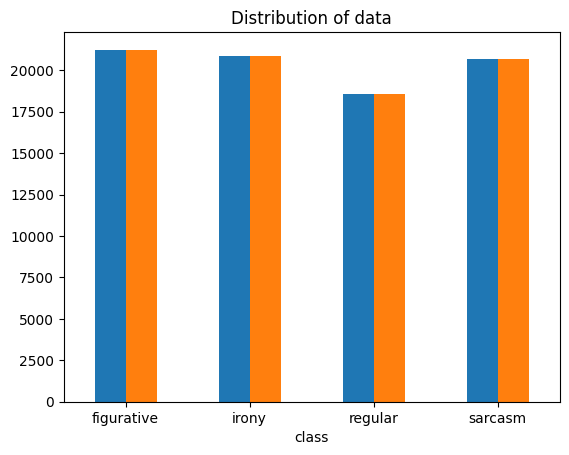

In [15]:
ax = df.groupby('class').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['figurative', 'irony', 'regular', 'sarcasm'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['tweets']), list(df['class'])

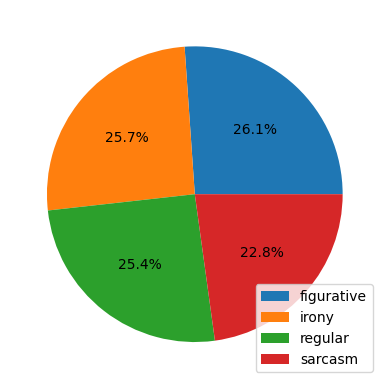

In [16]:
t1 = df['class'].value_counts()
plt.pie(t1,autopct='%1.1f%%')
plt.legend(df['class'].unique())
plt.show()

In [ ]:
'''t1 = df['class'].value_counts()
t2 = df['class'].unique()
plt.barh(t2,t1,height=0.5)               #barh() plots Horizontal bar....height argument decides the height of bars.The default width value is 0.8
plt.title('Count By class')
plt.xlabel('Count')
plt.ylabel('Class')
plt.show()'''

"t1 = df['class'].value_counts()\nt2 = df['class'].unique()\nplt.barh(t2,t1,height=0.5)               #barh() plots Horizontal bar....height argument decides the height of bars.The default width value is 0.8\nplt.title('Count By class')\nplt.xlabel('Count')\nplt.ylabel('Class')\nplt.show()"

**Data Processing**

In [17]:
#convert text in lower case
df['tweets'] = df['tweets'].str.lower()
df['tweets'].tail()

81403    photo: image via we heart it http://t.co/ky8nf...
81404    i never knew..i better put this out to the uni...
81405    hey just wanted to say thanks @ puberty for le...
81406    i'm sure coverage like the fox news special â...
81407    @skeyno16 at u13?! i won't believe it until i ...
Name: tweets, dtype: object

In [18]:
#Remove URL's
import re
def remove_url(text):
    return re.sub('((www.[^s]+)|(https?://[^s]+))|(http?://[^s]+)', '',text)

df['tweets'] = df['tweets'].apply(remove_url)
df.tail()

tweets    class  label
81403          photo: image via we heart it sarcasm....   sarcasm      3
81404  i never knew..i better put this out to the uni...  sarcasm      3
81405  hey just wanted to say thanks @ puberty for le...  sarcasm      3
81406  i'm sure coverage like the fox news special â...  sarcasm      3
81407  @skeyno16 at u13?! i won't believe it until i ...  sarcasm      3

In [19]:
def form_sentence(mylist):
    return ' '.join(mylist)

In [20]:
## Remove Twitter username handles from a given twitter text. (Removes @usernames)

from nltk.tokenize import TweetTokenizer
def cleaning_handles(text):
    tknzr = TweetTokenizer(strip_handles=True)
    return tknzr.tokenize(text)

#data['tweets'] = data['tweets'].astype('str')
df['tweets'] = df['tweets'].apply(cleaning_handles)
df['tweets'].head()

0    [be, aware, dirty, step, to, get, money, #stay...
1    [#sarcasm, for, #people, who, don't, understan...
2    [#dailymail, readers, being, sensible, as, alw...
3    [why, do, i, get, the, feeling, you, like, gam...
4    [-, you, probably, just, missed, the, text, .,...
Name: tweets, dtype: object

In [21]:
df['tweets'] = df['tweets'].apply(form_sentence)
df['tweets'].head()

0    be aware dirty step to get money #staylight #s...
1    #sarcasm for #people who don't understand #diy...
2    #dailymail readers being sensible as always #s...
3    why do i get the feeling you like games ? #sar...
4     - you probably just missed the text . #sarcastic
Name: tweets, dtype: object

In [22]:
#Remove special characters
import string
def remove_punctuation(text):
    text=str(text)
    return text.translate(str.maketrans('', '', string.punctuation))

df['tweets'] = df['tweets'].apply(remove_punctuation)
df.head()

tweets       class  label
0  be aware dirty step to get money staylight sta...  figurative      0
1  sarcasm for people who dont understand diy art...  figurative      0
2  dailymail readers being sensible as always sho...  figurative      0
3   why do i get the feeling you like games  sarcasm  figurative      0
4       you probably just missed the text  sarcastic  figurative      0

In [23]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [25]:
stopwords = set(stopwords.words('english'))

In [26]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])

In [27]:
df['tweets'] = df['tweets'].apply(cleaning_stopwords)
df['tweets'].head()

0    aware dirty step get money staylight staywhite...
1         sarcasm people dont understand diy artattack
2    dailymail readers sensible always shocker sarc...
3                       get feeling like games sarcasm
4                       probably missed text sarcastic
Name: tweets, dtype: object

In [28]:
#Lemmatization
lm = nltk.stem.WordNetLemmatizer()
def lemmatizer_on_text(data):
    data=str(data).split()
    text = [lm.lemmatize(word) for word in data]
    text=' '.join(text)
    return text
df['tweets'] = df['tweets'].apply(lemmatizer_on_text)
df['tweets'].head()

0    aware dirty step get money staylight staywhite...
1         sarcasm people dont understand diy artattack
2    dailymail reader sensible always shocker sarca...
3                        get feeling like game sarcasm
4                       probably missed text sarcastic
Name: tweets, dtype: object

In [30]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['tweets'] = df['tweets'].apply(cleaning_numbers)
df['tweets'].tail()

81403                        photo image via heart sarcasm
81404    never knew better put universe lol maybe there...
81405    hey wanted say thanks puberty letting apart it...
81406    im sure coverage like fox news special â   h...
81407                         u wont believe see p sarcasm
Name: tweets, dtype: object

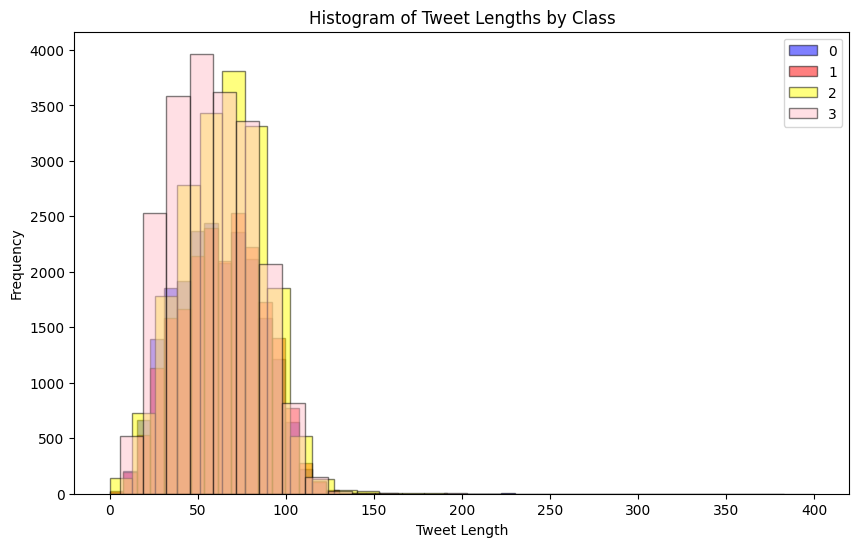

In [48]:
## Creating the histogram processed tweets and labels
tweets = df['tweets'].values
labels = df['label'].values

## calculate the length of the tweets for each class
class_lengths = {}
for i,label in enumerate(labels):
    if label not in class_lengths:
        class_lengths[label]=[]
    class_lengths[label].append(len(tweets[i]))

## plot the histogram
plt.figure(figsize=(10,6))
colors= ['blue', 'red', 'yellow', 'pink']
labels = class_lengths.keys()
for i,label in enumerate(labels):
    plt.hist(class_lengths[label],bins=30,edgecolor='black',alpha=0.5, label=label, color=colors[i])

plt.title('Histogram of Tweet Lengths by Class')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.legend()

In [32]:
#wordcloud
def wordcld(data,title):
  wc = WordCloud(max_words = 1000,background_color='black',stopwords=stopwords).generate(data)
  plt.figure(figsize = (15,15))
  plt.imshow(wc)
  plt.axis('off')
  plt.title(title)
  plt.show()

In [33]:
#Seperate the data of figurative class
figurative = df[df['class']=='figurative']
figurative = " ".join(figurative['tweets'])
figurative

'aware dirty step get money staylight staywhite sarcastic moralneeded â \x80 ¦ sarcasm people dont understand diy artattack dailymail reader sensible always shocker sarcastic dailyfail inhuntspocket theyhatethenhs get feeling like game sarcasm probably missed text sarcastic tune nigezie treated rachel plattens fight song move mtv get reminisce olamides local rapper irony timeschange iz thiz friggin dc love fest sarcasm moviefights man wish could sexually harass intoxicated minor go jail sarcasm car ride get listen jess whole time yeah woo cant wait either sarcasm aamir call bajrangibhaijaan salmans best movie yet decide whether sarcasm compliment sorry cant understand dark sense humor sarcasm work yay sarcasm fuck goodnight ð \x9f \x98 \x94 g town come mets thats like loss double team best sarcasm thought hot spot policing plan btw really working sarcasm dont daft dr ciara measles doesnt kill old fashioned disease like scurvy trench foot sarcasm dont think tv show could epic mastershow

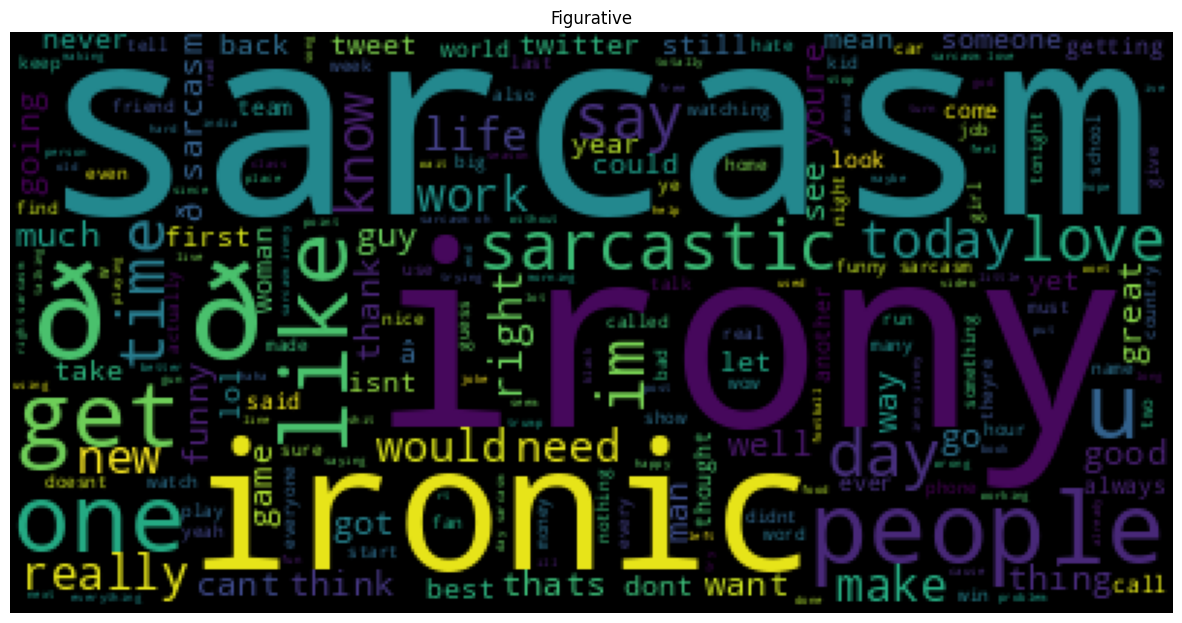

In [34]:
wordcld(figurative,'Figurative')

In [35]:
#Seperate the data of firony class
irony = df[df['class']=='irony']
irony = " ".join(irony['tweets'])
irony

'fav moment sepp blatter vid  clean first nothing football found walking human irony detroit disrespected wife prophet pseudo libtards playing blasphemy card irony know super yeay satisfying feeling get say exactly wanted say  character life goal irony youre going call someone ignorant stupid social medium least spell right irony tune nigezie treated rachel plattens fight song move mtv get reminisce olamides local rapper irony timeschange looking forward next week stepping away flash effect quicksilver irony get work realize oatmeal packet grabbed dinooatmeal monday irony two recent tweet sexism favorited twitter account send picture halfnaked woman irony waise blocking mean nida awesome u remember haha larka wud love blocked irony stated want destroy caliphate given way destroying nh might card irony shouldnt demonise muslim community believe freedom speech shut irony cameronsspeech please need captain america good irony marvel milkthatcow maybe im sure thats six word ð \x9f \x98 \x9d

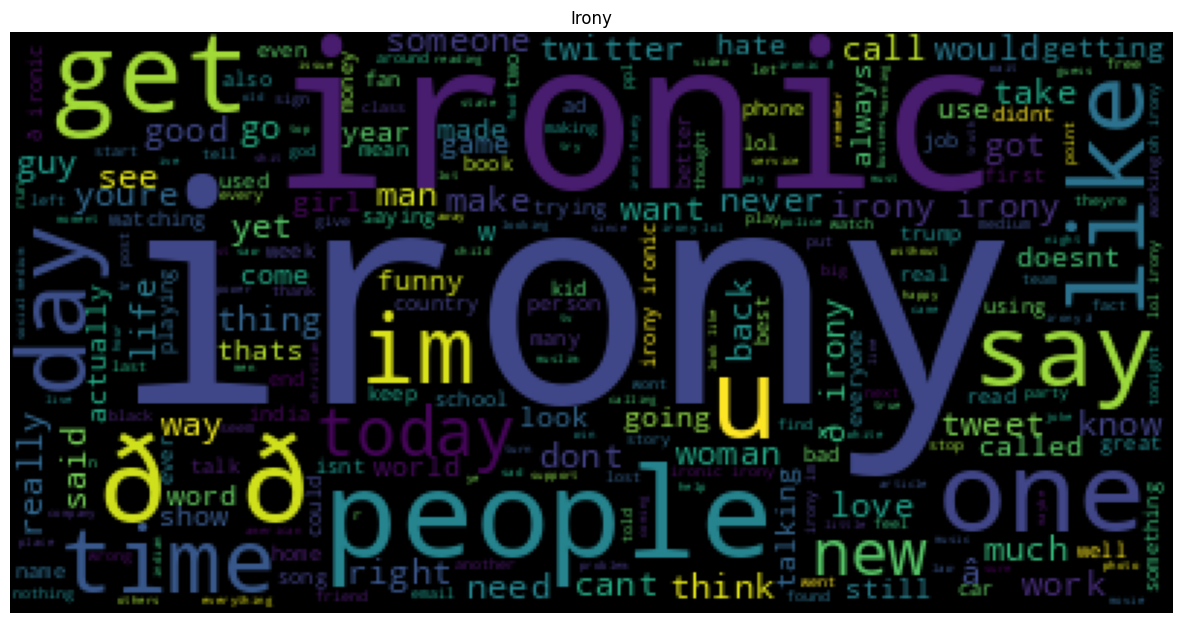

In [36]:
wordcld(irony,'Irony')

In [37]:
#Seperate the data of figurative class
regular = df[df['class']=='regular']
regular = " ".join(regular['tweets'])
regular

'new quote blessing curse feel much mondayinspiration late quote emotion feel empâ \x80 ¦ daddy uncle bubba life love loss laughter parkinson dreamtherapy sjwnjin i parkie late coach basketball ayvee im soundcloud late night musicafterdark banger rap hip hop drake lil wayne hot np sxlqr h late starting dinner tonight im prepping go mushroom redpepperâ \x80 ¦ happy birthdayyyyy late ð \x9f \x98 gunz late night radio favorite jamz play back back jam match mood daughter father mother happy family late post fun walk  angela pic â \x80 \x94 photo late night eerie lady eerielady eerie banshee sheneedstoeatyoursoul late artistoninstagram coffee late cafe turning point augustphotochallenge day late nail need manicure really bad raleighdurhamâ \x80 ¦ mycurrentsituation ð \x9f \x8d ´ late zaxbys eating wingsnthing ð \x9f \x98 \x8b wingsandthings yummyâ \x80 ¦ better late never happy birthday maam madonna wllnp two four go monday kick back late night selfie date hope everyones monday wasâ \x80 ¦ 

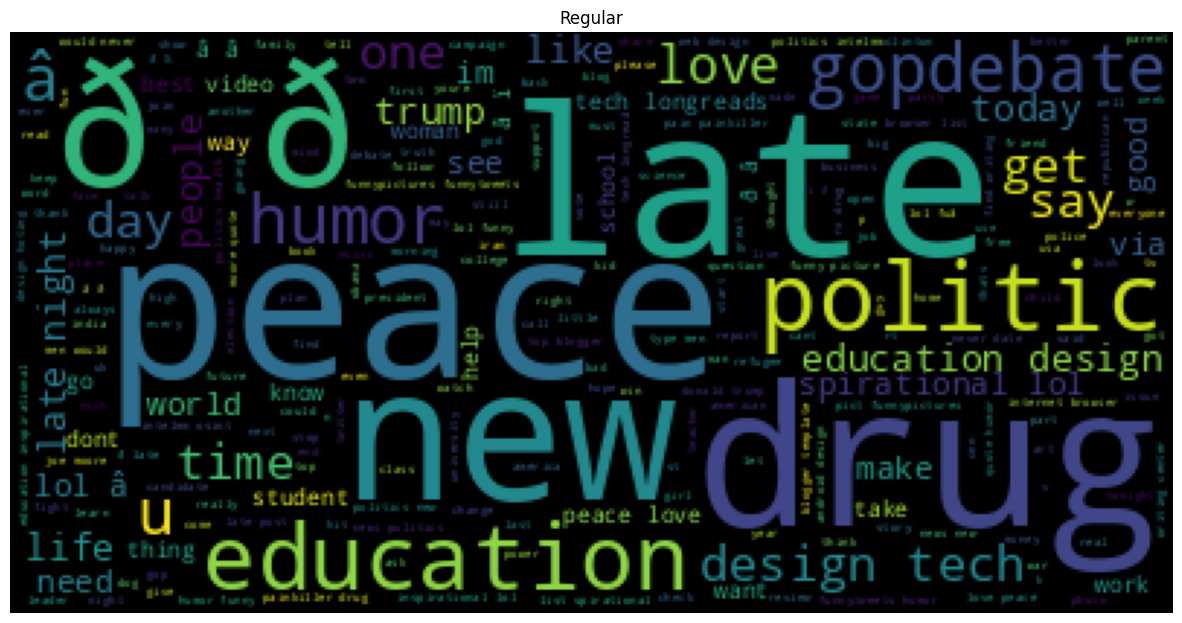

In [38]:
wordcld(regular,'Regular')

In [39]:
#Seperate the data of figurative class
sarcasm = df[df['class']=='sarcasm']
sarcasm = " ".join(sarcasm['tweets'])
sarcasm

'â \x80 \x9c sarcastic people actually smarter sexier successful aware dirty step get money staylight staywhite sarcastic moralneeded â \x80 ¦ ca  day rain  imaginarydrought dontbelievethehype sarcasm access implement home play flintstakesd sarcasm news get even better sarcastic darkmatter five please dont die dont ride long joe edwin travis lock one sarcasm dailymail reader sensible always shocker sarcastic dailyfail inhuntspocket theyhatethenhs tell server want little ice lol serverlife sarcasm firkinonbloorâ \x80 ¦ supfep functional part fam yeah okay hah ilaugh thatsfunny sure sarcastic seriouslywtf kemon la siapa la yang tak tau tu hehe blessed blast year stay th foreverrrrr sarcastic yes orton v sheamus fresh hot match start battleground sarcasm probably missed text sarcastic repost thegoodcomedy thegoodvibe sarcastic woohoo sarcastic teammoth chillyandclear another score fda way protect american people sarcasm thats girl sarcastic right ð \x9f \x98 \x82 ð \x9f \x98 \x82 ð \x9f \

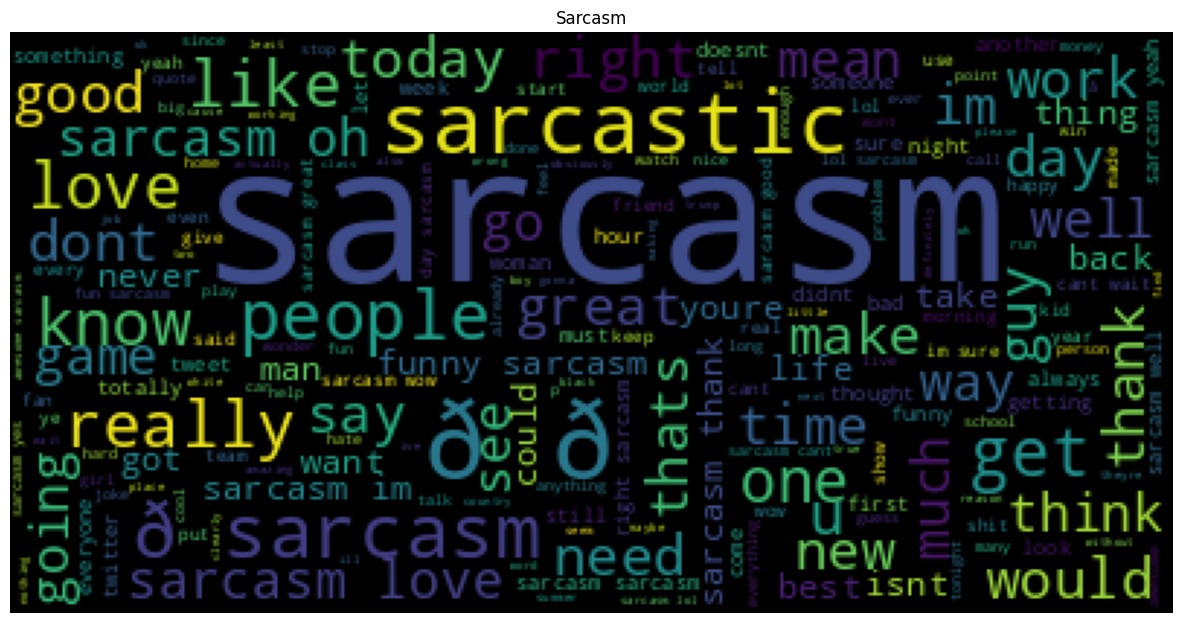

In [40]:
wordcld(sarcasm,'Sarcasm')

# Tf-Idf vectorozer

In [49]:
x=df['tweets']
y=df['class']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state =61)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser1 = TfidfVectorizer(ngram_range=(1,1), max_features=500)
vectoriser1.fit(X_train)
print('No. of feature_words: ', len(vectoriser1.get_feature_names_out()))

No. of feature_words:  500


In [52]:
X_train = vectoriser1.fit_transform(X_train)
X_test  = vectoriser1.fit_transform(X_test)

In [54]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['figurative', 'irony', 'regular', 'sarcasm']
    cm_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=0)[:, np.newaxis] * 100
    print(pd.DataFrame(cf_matrix))
    
    sns.heatmap(cf_matrix, annot=True,cmap = 'Blues',fmt = '.1f',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [55]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report

              precision    recall  f1-score   support

  figurative       0.27      0.40      0.32      4240
       irony       0.20      0.09      0.13      4135
     regular       0.29      0.61      0.39      3707
     sarcasm       0.21      0.02      0.03      4190

    accuracy                           0.27     16272
   macro avg       0.24      0.28      0.22     16272
weighted avg       0.24      0.27      0.21     16272

      0    1     2    3
0  1694  497  1951   98
1  1723  382  1917  113
2  1046  371  2243   47
3  1725  658  1737   70


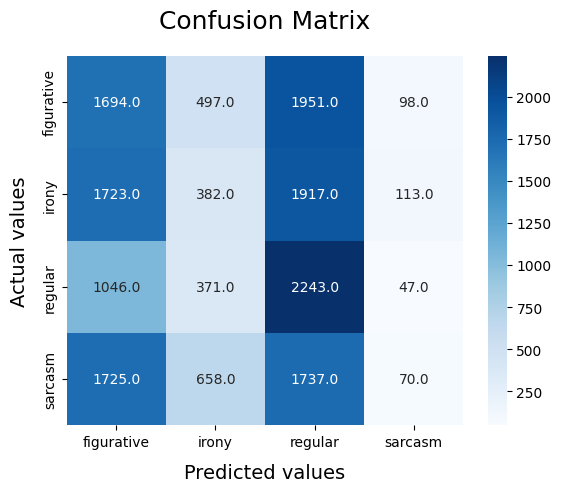

In [56]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

In [58]:
## import ngram and convert the label to list 
from nltk.util import ngrams 
from nltk.tokenize import word_tokenize

text_list = df['tweets'].tolist()
label_list = df['label'].tolist()

# Word Embedding 

In [59]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split

# Tokenize the text
tokenized_text = [tweets.split() for tweets in text_list]

# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_text,vector_size=500,epochs=25,window=5,min_count=1,workers=4)

# Function to generate the document vector by averaging word vectors
def document_vector(model, doc):
    doc_vector = np.zeros(model.vector_size)
    count = 0
    for word in doc:
        if word in model.wv:
            doc_vector += model.wv[word]
            count += 1
    if count != 0:
        doc_vector /= count
    return doc_vector

# Generate document vector for each tweet
text_vectors= [document_vector(model,text)for text in tokenized_text]

# Convert text_vector to numpy array
X = np.array(text_vectors)

# Assuming 'labels' is a list containing the corresponding labels for each tweet
y = np.array(label_list)

## Spliting the data into training testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
print(X_train.shape)
print(X_test.shape)

(65087, 500)
(16272, 500)


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

## Creating the instance of Logistic Regression model
log_reg = LogisticRegression(C=30.0,solver='newton-cg',multi_class='multinomial',random_state=42)

## Train the model 
log_reg.fit(X_train,y_train)

## predict the label for test set
y_pred = log_reg.predict(X_test)

In [63]:
## Evaluate the model 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('Accuracy :',accuracy)

              precision    recall  f1-score   support

           0       0.31      0.03      0.06      4168
           1       0.67      0.96      0.79      4286
           2       0.98      1.00      0.99      3699
           3       0.66      0.95      0.78      4119

    accuracy                           0.73     16272
   macro avg       0.65      0.74      0.65     16272
weighted avg       0.65      0.73      0.65     16272

[[ 142 2012   28 1986]
 [ 132 4102   50    2]
 [   0   11 3685    3]
 [ 190    1    4 3924]]
Accuracy : 0.728429203539823


In [ ]:
'''from sklearn import svm
from sklearn.svm import SVC
clf = SVC(kernel='rbf',gamma=0.0001)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
model_Evaluate(clf)'''

In [66]:
# saving the model 
import pickle 
pickle_out = open("log_reg.pkl", mode = "wb") 
pickle.dump(log_reg, pickle_out) 
pickle_out.close()

In [ ]:
#pickle.dump(clf,open('clf.pkl','wb'))